### Prerequisites

1. Libraries installed
2. south-building and gerrard-hall folders from here https://drive.google.com/drive/folders/11g5E_OmOLXGSB0of2d7QMTKsF7hqyu1i

In [1]:
import pycolmap
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

### 1. Reconstruction

Obtaining a point cloud from a set of images

In [88]:
scene_folder = Path('../data/small_city_road_outside-d4x')
images_folder = scene_folder / 'images'
database_path = scene_folder / 'database.db'
output_path = scene_folder / 'undistorted_images'
os.makedirs(output_path, exist_ok=True)

#### 2.1 Sparse Reconstruction

In [3]:
if not os.path.exists(scene_folder / '0'):
    pycolmap.extract_features(database_path, images_folder, camera_model='SIMPLE_PINHOLE')
    pycolmap.match_exhaustive(database_path)
    maps = pycolmap.incremental_mapping(database_path, images_folder, scene_folder)
    maps[0].write(scene_folder)
    pycolmap.undistort_images(output_path=str(output_path), image_path=str(images_folder), input_path=scene_folder / '0')

In [4]:
# pycolmap.undistort_images(output_path=str(output_path), image_path=str(images_folder), input_path=scene_folder / 'sparse/0')

#### 2.2 Examining Reconstruction

Reconstruction consists of three elements: images, points and cameras

In [89]:
reconstruction = pycolmap.Reconstruction(scene_folder / 'sparse/0')
print(reconstruction.summary())

Reconstruction:
	num_reg_images = 3673
	num_cameras = 3673
	num_points3D = 130874
	num_observations = 708577
	mean_track_length = 5.41419
	mean_observations_per_image = 192.915
	mean_reprojection_error = 1.0604


In [11]:
reconstruction.export_PLY(output_path / 'sparse.ply')

In [90]:
reconstruction.cameras

{1: Camera(camera_id=1, model=SIMPLE_RADIAL, width=250, height=250, params=[276.316070, 125.000000, 125.000000, 0.746567] (f, cx, cy, k)),
 2: Camera(camera_id=2, model=SIMPLE_RADIAL, width=250, height=250, params=[275.749633, 125.000000, 125.000000, 0.535800] (f, cx, cy, k)),
 3517: Camera(camera_id=3517, model=SIMPLE_RADIAL, width=250, height=250, params=[70.806173, 125.000000, 125.000000, -0.007145] (f, cx, cy, k)),
 3: Camera(camera_id=3, model=SIMPLE_RADIAL, width=250, height=250, params=[281.877019, 125.000000, 125.000000, 0.408585] (f, cx, cy, k)),
 1970: Camera(camera_id=1970, model=SIMPLE_RADIAL, width=250, height=250, params=[122.578229, 125.000000, 125.000000, -0.026378] (f, cx, cy, k)),
 4: Camera(camera_id=4, model=SIMPLE_RADIAL, width=250, height=250, params=[287.365967, 125.000000, 125.000000, 0.557549] (f, cx, cy, k)),
 1463: Camera(camera_id=1463, model=SIMPLE_RADIAL, width=250, height=250, params=[348.560082, 125.000000, 125.000000, -0.157067] (f, cx, cy, k)),
 5: Cam

In [7]:
for cam_id, cam in reconstruction.cameras.items():
    print(cam_id, cam)

1 Camera(camera_id=1, model=PINHOLE, width=206, height=206, params=[276.316070, 276.316070, 103.000000, 103.000000] (fx, fy, cx, cy))
3517 Camera(camera_id=3517, model=PINHOLE, width=254, height=254, params=[70.806173, 70.806173, 127.000000, 127.000000] (fx, fy, cx, cy))
2 Camera(camera_id=2, model=PINHOLE, width=214, height=214, params=[275.749633, 275.749633, 107.000000, 107.000000] (fx, fy, cx, cy))
1970 Camera(camera_id=1970, model=PINHOLE, width=256, height=256, params=[122.578229, 122.578229, 128.000000, 128.000000] (fx, fy, cx, cy))
3 Camera(camera_id=3, model=PINHOLE, width=221, height=221, params=[281.877019, 281.877019, 110.500000, 110.500000] (fx, fy, cx, cy))
1463 Camera(camera_id=1463, model=PINHOLE, width=254, height=254, params=[348.560082, 348.560082, 127.000000, 127.000000] (fx, fy, cx, cy))
4 Camera(camera_id=4, model=PINHOLE, width=215, height=215, params=[287.365967, 287.365967, 107.500000, 107.500000] (fx, fy, cx, cy))
5 Camera(camera_id=5, model=PINHOLE, width=212

In [33]:
cam.model.name

'SIMPLE_PINHOLE'

In [8]:
help(reconstruction)

Help on Reconstruction in module pycolmap object:

class Reconstruction(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Reconstruction
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      __copy__(self: pycolmap.Reconstruction) -> pycolmap.Reconstruction
 |  
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Reconstruction, arg0: dict) -> pycolmap.Reconstruction
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: pycolmap.Reconstruction) -> None
 |      
 |      2. __init__(self: pycolmap.Reconstruction, sfm_dir: str) -> None
 |  
 |  __repr__(...)
 |      __repr__(self: pycolmap.Reconstruction) -> str
 |  
 |  add_camera(...)
 |      add_camera(self: pycolmap.Reconstruction, camera: pycolmap.Camera) -> None
 |      
 |      Add new camera. There is only one camera per image, while multiple images
 |      might b

In [9]:
images_subset = list(reconstruction.images.items())[:10]
for image_id, image in images_subset:
    print(image_id, image)

1 Image(image_id=1, camera_id=1, name="0000.png", triangulated=175/279)
3517 Image(image_id=3517, camera_id=3516, name="3515.png", triangulated=212/413)
2 Image(image_id=2, camera_id=8, name="0007.png", triangulated=152/297)
1970 Image(image_id=1970, camera_id=1963, name="1962.png", triangulated=145/460)
3 Image(image_id=3, camera_id=3, name="0002.png", triangulated=187/321)
1463 Image(image_id=1463, camera_id=1470, name="1469.png", triangulated=371/671)
4 Image(image_id=4, camera_id=7, name="0006.png", triangulated=194/310)
5 Image(image_id=5, camera_id=11, name="0010.png", triangulated=170/276)
1457 Image(image_id=1457, camera_id=1457, name="1456.png", triangulated=265/623)
6 Image(image_id=6, camera_id=5, name="0004.png", triangulated=216/282)


In [10]:
points_3d_subset = list(reconstruction.points3D.items())[:10]
for point3D_id, point3D in points_3d_subset:
    print(point3D_id, point3D)
    print(point3D.xyz)

94797 Point3D(xyz=[-4.98601, -0.0997787, 0.758024], color=[85, 84, 87], error=1.38662, track=Track(length=5))
[-4.98600991 -0.09977873  0.75802444]
163637 Point3D(xyz=[1.12173, -0.00553868, 2.03288], color=[73, 79, 89], error=0.228934, track=Track(length=3))
[ 1.12173058 -0.00553868  2.03288006]
1509 Point3D(xyz=[-5.6399, 0.135181, 0.775706], color=[114, 115, 115], error=0.84805, track=Track(length=5))
[-5.63989686  0.13518136  0.77570611]
130777 Point3D(xyz=[-3.7957, 0.0939554, -0.0186317], color=[236, 229, 223], error=0.818059, track=Track(length=8))
[-3.79570385  0.09395541 -0.01863175]
2 Point3D(xyz=[-5.88622, 0.130471, 0.980671], color=[114, 116, 119], error=1.69756, track=Track(length=6))
[-5.88621986  0.13047056  0.98067054]
37480 Point3D(xyz=[6.54932, -0.225332, 0.473563], color=[59, 61, 64], error=1.30455, track=Track(length=2))
[ 6.54932339 -0.22533151  0.47356319]
68197 Point3D(xyz=[6.32796, -0.206587, 0.255946], color=[62, 64, 69], error=0.296535, track=Track(length=2))
[ 6

In [12]:
point3D.track.elements

[TrackElement(image_id=3500, point2D_idx=199),
 TrackElement(image_id=3487, point2D_idx=220),
 TrackElement(image_id=3490, point2D_idx=218)]

In [13]:
for camera_id, camera in reconstruction.cameras.items():
    print(camera_id, camera)

1 Camera(camera_id=1, model=PINHOLE, width=206, height=206, params=[276.316070, 276.316070, 103.000000, 103.000000] (fx, fy, cx, cy))
3517 Camera(camera_id=3517, model=PINHOLE, width=254, height=254, params=[70.806173, 70.806173, 127.000000, 127.000000] (fx, fy, cx, cy))
2 Camera(camera_id=2, model=PINHOLE, width=214, height=214, params=[275.749633, 275.749633, 107.000000, 107.000000] (fx, fy, cx, cy))
1970 Camera(camera_id=1970, model=PINHOLE, width=256, height=256, params=[122.578229, 122.578229, 128.000000, 128.000000] (fx, fy, cx, cy))
3 Camera(camera_id=3, model=PINHOLE, width=221, height=221, params=[281.877019, 281.877019, 110.500000, 110.500000] (fx, fy, cx, cy))
1463 Camera(camera_id=1463, model=PINHOLE, width=254, height=254, params=[348.560082, 348.560082, 127.000000, 127.000000] (fx, fy, cx, cy))
4 Camera(camera_id=4, model=PINHOLE, width=215, height=215, params=[287.365967, 287.365967, 107.500000, 107.500000] (fx, fy, cx, cy))
5 Camera(camera_id=5, model=PINHOLE, width=212

In [14]:
width = reconstruction.cameras[1].width
height = reconstruction.cameras[1].height

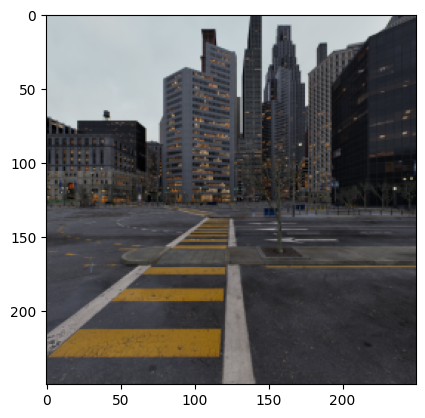

In [71]:
np_img = mpimg.imread(images_folder / '0800.png')
plt.imshow(np_img)

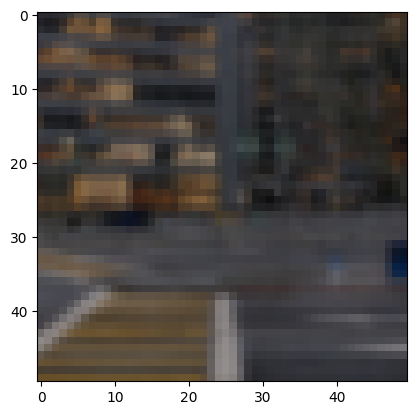

In [70]:
np_img = mpimg.imread(output_path / f'images/{reconstruction.images[800].name}')
plt.imshow(np_img)

### 2. Extrinsic & Intrinsic Matrix

#### 2.1 Camera

3D points are in the world coordinates and one of the steps is transforming them to the camera coordinate system.

In [46]:
img = reconstruction.images[700]
img_name = img.name
help(img.cam_from_world)

Help on Rigid3d in module pycolmap object:

class Rigid3d(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Rigid3d
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      __copy__(self: pycolmap.Rigid3d) -> pycolmap.Rigid3d
 |  
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Rigid3d, arg0: dict) -> pycolmap.Rigid3d
 |  
 |  __getstate__(...)
 |      __getstate__(self: pycolmap.Rigid3d) -> dict
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: pycolmap.Rigid3d) -> None
 |      
 |      2. __init__(self: pycolmap.Rigid3d, arg0: pycolmap.Rotation3d, arg1: numpy.ndarray[numpy.float64[3, 1]]) -> None
 |      
 |      3. __init__(self: pycolmap.Rigid3d, arg0: numpy.ndarray[numpy.float64[3, 4]]) -> None
 |      
 |      4. __init__(self: pycolmap.Rigid3d, arg0: dict) -> None
 |      
 |      5. __init__(self: pycolmap.

In [47]:
help(img)

Help on Image in module pycolmap object:

class Image(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Image
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      __copy__(self: pycolmap.Image) -> pycolmap.Image
 |  
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Image, arg0: dict) -> pycolmap.Image
 |  
 |  __getstate__(...)
 |      __getstate__(self: pycolmap.Image) -> dict
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: pycolmap.Image) -> None
 |      
 |      2. __init__(self: pycolmap.Image, name: str = '', points2D: pycolmap.ListPoint2D = [], cam_from_world: pycolmap.Rigid3d = Rigid3d(quat_xyzw=[0, 0, 0, 1], t=[0, 0, 0]), camera_id: int = 4294967295, id: int = 4294967295) -> None
 |      
 |      3. __init__(self: pycolmap.Image, name: str = '', keypoints: numpy.ndarray[numpy.float64[m, 2]] = array([],

#### 2.2 Homogeneous coordinates
These are coordinates with added extra dimension. For a point in 3D coordinates, $v = (x, y, z)$, it transforms to 4D $v_h = (x, y, z, 1)$. We can also transform from 4D coordinates back to 3D $v = (x/w, y/w, z/w)$, where $w$ is the 4th coordinate

In [48]:
points = np.array([point.xyz for point in reconstruction.points3D.values()])
print(points[:2])
homogeneous_points = np.concatenate((points, np.ones((len(points), 1), np.float32)), axis=1)
print(homogeneous_points[:2])

[[-4.98600991 -0.09977873  0.75802444]
 [ 1.12173058 -0.00553868  2.03288006]]
[[-4.98600991 -0.09977873  0.75802444  1.        ]
 [ 1.12173058 -0.00553868  2.03288006  1.        ]]


#### 2.3 Extrinsic Matrix
These parameters are **rotation** and **translation** of the camera in the world coordinate system. The rotation can be expressed by quarternion (that uses only 4x1 matrix instead of 3x3 matrix). The translation vector tells the camera's position relative to the origin.

\begin{pmatrix}
r_{11} & r_{12} & r_{13} & t_{x} \\
r_{21} & r_{22} & r_{23} & t_{y} \\
r_{31} & r_{32} & r_{33} & t_{z} \\
0 & 0 & 0 & 1
\end{pmatrix}

It is used to translate world coordinate system to camera coordinate system.

In [49]:
print(img.cam_from_world)

Rigid3d(quat_xyzw=[-0.0025978, 0.310054, -0.0437711, 0.949707], t=[-5.46806, 0.755976, 3.45981])


In [50]:
print(img.cam_from_world.matrix()) # [R | t] matrix

[[ 0.80390064  0.08152846  0.58914928 -5.46806308]
 [-0.08475031  0.99615469 -0.02220852  0.75597635]
 [-0.58869444 -0.03207714  0.80771896  3.45980874]]


In [51]:
cam.params

array([284.49204161, 284.49204161, 111.5       , 111.5       ])

In [52]:
img.cam_from_world.translation

array([-5.46806308,  0.75597635,  3.45980874])

In [53]:
img.cam_from_world.rotation.quat

array([-0.0025978 ,  0.31005447, -0.04377107,  0.9497071 ])

In [54]:
R = img.cam_from_world.matrix()[:3, :3]

In [55]:
qw = np.sqrt(1 + R[0, 0] + R[1, 1] + R[2, 2]) / 2
qw4 = qw * 4.0
qx = (R[2, 1] - R[1, 2]) / qw4
qy = (R[0, 2] - R[2, 0]) / qw4
qz = (R[1, 0] - R[0, 1]) / qw4

def compute_quaternion(R):
    qw = np.sqrt(1 + R[0, 0] + R[1, 1] + R[2, 2]) / 2
    qw4 = qw * 4.0
    qx = (R[2, 1] - R[1, 2]) / qw4
    qy = (R[0, 2] - R[2, 0]) / qw4
    qz = (R[1, 0] - R[0, 1]) / qw4
    return np.array([qw, qx, qy, qz])

In [56]:
np.array([qx, qy, qz, qw])

array([-0.0025978 ,  0.31005447, -0.04377107,  0.9497071 ])

In [57]:
extrinsic_matrix = np.concatenate((img.cam_from_world.matrix(), np.array([[0, 0, 0, 1]])))
extrinsic_matrix

array([[ 0.80390064,  0.08152846,  0.58914928, -5.46806308],
       [-0.08475031,  0.99615469, -0.02220852,  0.75597635],
       [-0.58869444, -0.03207714,  0.80771896,  3.45980874],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [58]:
projected_to_camera_viewpoint = (extrinsic_matrix @ homogeneous_points.T)
projected_to_camera_viewpoint.shape

(4, 130874)

#### 2.4 Intrinsic Matrix
This is needed to perform transformation between a point P in the 3D camera reference system to a point P' in the 2D image plane.

 \begin{pmatrix}
 f_x & 0 & c_x & 0 \\
 0 & f_y & c_y & 0 \\
 0 & 0 & 1 & 0
 \end{pmatrix}

- $f_x$, $f_y$ : focal length
- $c_x$, $c_y$ : translation vector that describes offset between digital and camera coordinates

(this form of matrix is needed to make translations on 3D points)

In [59]:
fx, fy, cx, cy = reconstruction.cameras[1].params
intrinsic_matrix = np.array([[fx, 0, cx, 0], [0, fy, cy, 0], [0, 0, 1, 0]])

In [60]:
projected_to_image_viewpoint = (intrinsic_matrix @ projected_to_camera_viewpoint).T

In [61]:
projected_to_image_viewpoint.shape

(130874, 3)

Next, points need to be normalized to go back from homogenous coordinates (3D) to 2D points.

In [62]:
projected_points = np.array(projected_to_image_viewpoint[:, :2])
projected_points[:, 0] /= projected_to_image_viewpoint[:, 2]
projected_points[:, 1] /= projected_to_image_viewpoint[:, 2]

### 3. Projection 1

First way of projecting 3D point cloud to 2D using extrinsic and intrinsic matrices derived above.



In [63]:
colors = np.array([p.color for p in reconstruction.points3D.values()]) / 255.0

In [64]:
points_ids = np.where((projected_points[:, 0] > 0) & (projected_points[:, 0] < width) & (projected_points[:, 1] > 0) & (projected_points[:, 1] < height))[0]
selected_points = projected_points[points_ids]
selected_colors = colors[points_ids]

It is not really upside down, it's that the point (0, 0) is in the wrong place - it should be in the upper left corner, not in the lower left.

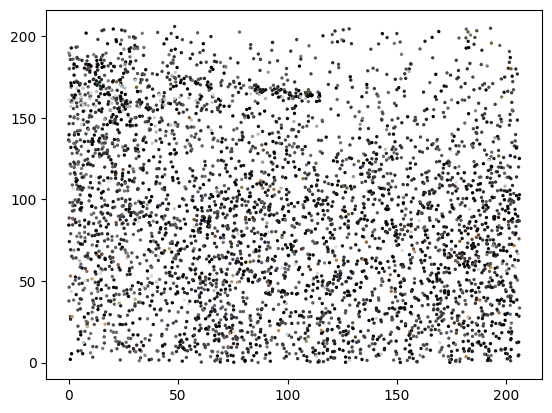

In [65]:
plt.scatter(selected_points[:, 0], selected_points[:, 1], s=2, c=selected_colors)

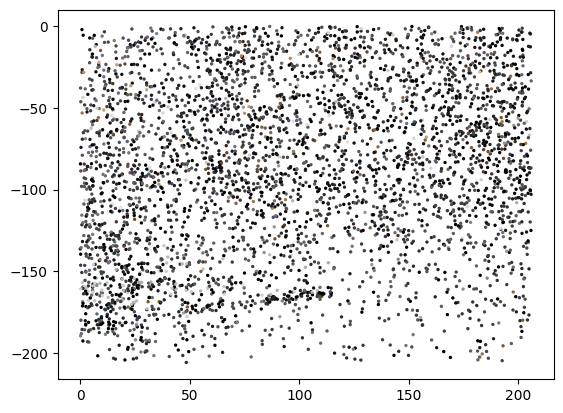

In [66]:
plt.scatter(selected_points[:, 0], -selected_points[:, 1], s=2, c=selected_colors)

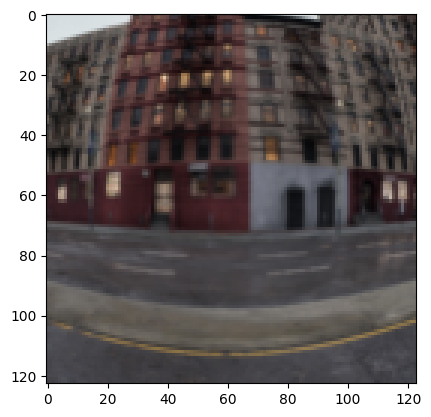

In [67]:
image = mpimg.imread(output_path / f'images/{img_name}')
plt.imshow(image)

### 4. Perspective projection (OPENGL)

Another, probably more correct way is to perform projection using opengl perspective matrix.

$$\begin{pmatrix}
\frac{2n}{r - l} & 0 & \frac{r + l}{r - l} & 0 \\
0 & \frac{2n}{t - b} & \frac{t + b}{t - b} & 0 \\
0 & 0 & - \frac{f + n}{f - n} & \frac{-2fn}{f - n} \\
0 & 0 & -1 & 0
\end{pmatrix}$$

where
- $n, f$ - near, far are distances of near and far clipping planes
- $l, t, r, b$ - left, top, right, bottom are coordinates boundaries

It actually encloses points into the viewing volume of camera - called clip space. This clip space is defined partially by us (near and far planes).

<div>
<img src="images/projectionOpenGL2.png" width="400">
</div>

In [73]:
focal_x, focal_y = fx, fy
znear = 1
zfar = 5

# https://stackoverflow.com/questions/39992968/how-to-calculate-field-of-view-of-the-camera-from-camera-intrinsic-matrix
fov_x = np.array([2 * math.atan(width / (2 * focal_x))])
fov_y = np.array([2 * math.atan(height / (2 * focal_y))])

tan_half_foc_x = math.tan((fov_x / 2))
tan_half_foc_y = math.tan((fov_y / 2))

top = tan_half_foc_y * znear
bottom = -top
right = tan_half_foc_x * znear
left = -right

P = np.zeros((4, 4))

P[0, 0] = 2.0 * znear / (right - left)
P[1, 1] = 2.0 * znear / (top - bottom)
P[0, 2] = (right + left) / (right - left)
P[1, 2] = (top + bottom) / (top - bottom)
P[3, 2] = -1.0
P[2, 2] = -zfar / (zfar - znear) # this is to make depth be in range [0, 1]
P[2, 3] =  -(zfar * znear) / (zfar - znear) # this is to make depth be in range [0, 1]

C:\Users\julia\AppData\Local\Temp\ipykernel_14296\2600424310.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tan_half_foc_x = math.tan((fov_x / 2))
C:\Users\julia\AppData\Local\Temp\ipykernel_14296\2600424310.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tan_half_foc_y = math.tan((fov_y / 2))


In [74]:
P

array([[ 2.68268029,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.68268029,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.25      , -1.25      ],
       [ 0.        ,  0.        , -1.        ,  0.        ]])

In [75]:
camera_coordinates = homogeneous_points @ extrinsic_matrix.T

In [76]:
clip_coordinates = (camera_coordinates @ P.T)

In [77]:
clip_coordinates

array([[-24.24570204,   2.84984499, -10.01314549,  -7.01051639],
       [ -9.03817766,   1.63709143,  -6.80203201,  -4.4416256 ],
       [-25.57654503,   3.62535697, -10.50275122,  -7.40220098],
       ...,
       [ -1.48000467,   0.18043367,  -1.71406742,  -0.37125393],
       [ -1.65222292,   0.14158795,  -1.75742699,  -0.4059416 ],
       [ -0.41864752,   0.03063837,  -1.42880811,  -0.14304649]])

Next, points outside the view frustum are thrown away and the remaining are converted to **NDC** coordinates.

<div>
<img src="images/perspective_projection_stages.png" width="800">
</div>

In [78]:
clip_ids = (clip_coordinates[:, 3] < clip_coordinates[:, 0]) & (clip_coordinates[:, 0] < -clip_coordinates[:, 3]) & (clip_coordinates[:, 3] < clip_coordinates[:, 1]) & (clip_coordinates[:, 1] < -clip_coordinates[:, 3]) & (camera_coordinates[:, 2] > znear) & (camera_coordinates[:, 2] < zfar)

In [79]:
np.sum(clip_ids)

np.int64(1123)

In [80]:
clip_ids.shape

(130874,)

In [81]:
ndc_coordinates = np.copy(clip_coordinates[:, :3])
ndc_coordinates[:, 0] = ndc_coordinates[:, 0] / clip_coordinates[:, 3]
ndc_coordinates[:, 1] = ndc_coordinates[:, 1] / clip_coordinates[:, 3]
ndc_coordinates[:, 2] = ndc_coordinates[:, 2] / clip_coordinates[:, 3]

In [82]:
ndc_coordinates

array([[ 3.45847591, -0.40651   ,  1.42830356],
       [ 2.03488057, -0.36857934,  1.53142849],
       [ 3.45526217, -0.48976743,  1.41886869],
       ...,
       [ 3.98650234, -0.48601147,  4.6169677 ],
       [ 4.07010007, -0.34878898,  4.3292607 ],
       [ 2.92665356, -0.21418468,  9.98841785]])

In [83]:
c = colors[clip_ids]
p = ndc_coordinates[clip_ids]

Coordinates should be: X, Y in range $[-1, 1]$ and Z in $[0, 1]$ (Z is broken :/)

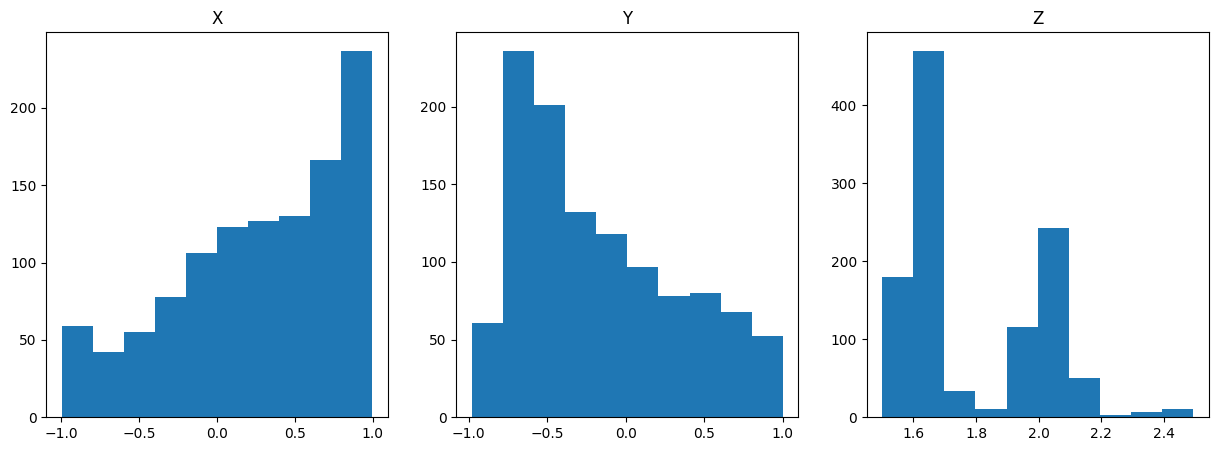

In [84]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('X')
plt.hist(p[:, 0])
plt.subplot(1, 3, 2)
plt.title('Y')
plt.hist(p[:, 1])
plt.subplot(1, 3, 3)
plt.title('Z')
_ = plt.hist(p[:, 2])

You can see that the background points, that are not in reality visible, are rejected (bc they are outside the view frustrum)

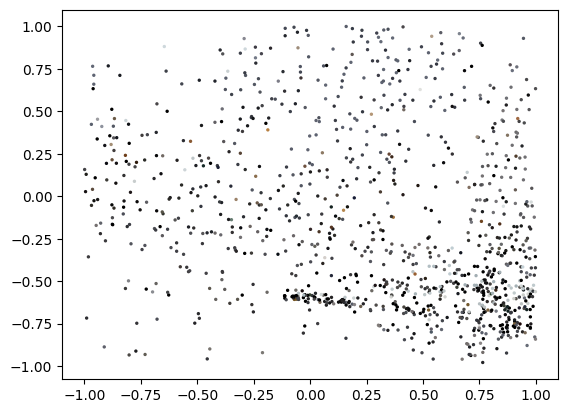

In [85]:
plt.scatter(p[:, 0], p[:, 1], s=2, c=c)

Next, we need to actually convert it to screen coordinates

In [86]:
x_off, y_off = 0, 0

screen_coordinates = np.zeros((len(p), 3))

screen_coordinates[:, 0] = x_off + 0.5 * (-p[:, 0] + 1) * width
screen_coordinates[:, 1] = y_off + 0.5 * (-p[:, 1] + 1) * height
screen_coordinates[:, 2] = 0.5 * (zfar - znear) * p[:, 2] + 0.5 * (zfar + znear)  # can be used to resolve depth

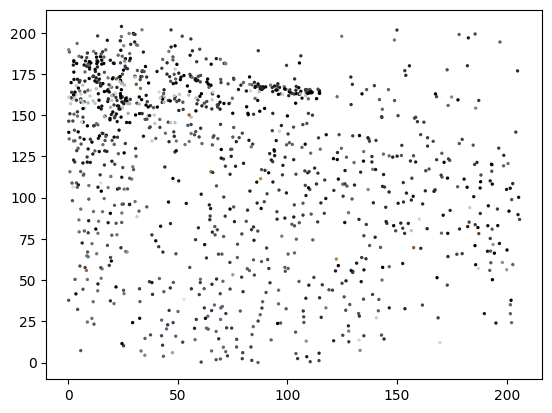

In [87]:
plt.scatter(screen_coordinates[:, 0], screen_coordinates[:, 1], s=2, c=c)

The remapping of the projected point's z coordinate is nonlinear. Near and far clipping planes should be chosen wisely to prevent z-fighting (that is, z coordinate being squeezed to a small range which results in precision loss)

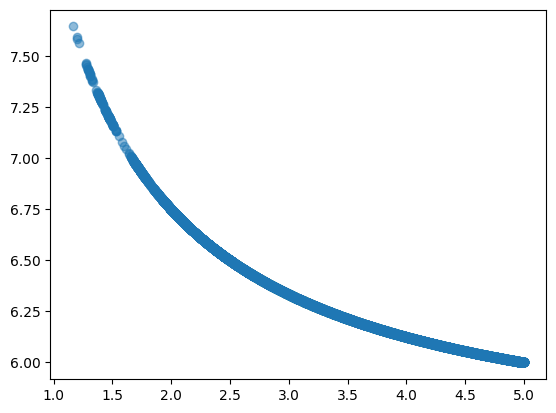

In [45]:
plt.scatter(camera_coordinates[clip_ids, 2], screen_coordinates[:, 2], alpha=0.5)

#### Changing image size

In [46]:
from skimage.transform import downscale_local_mean, resize

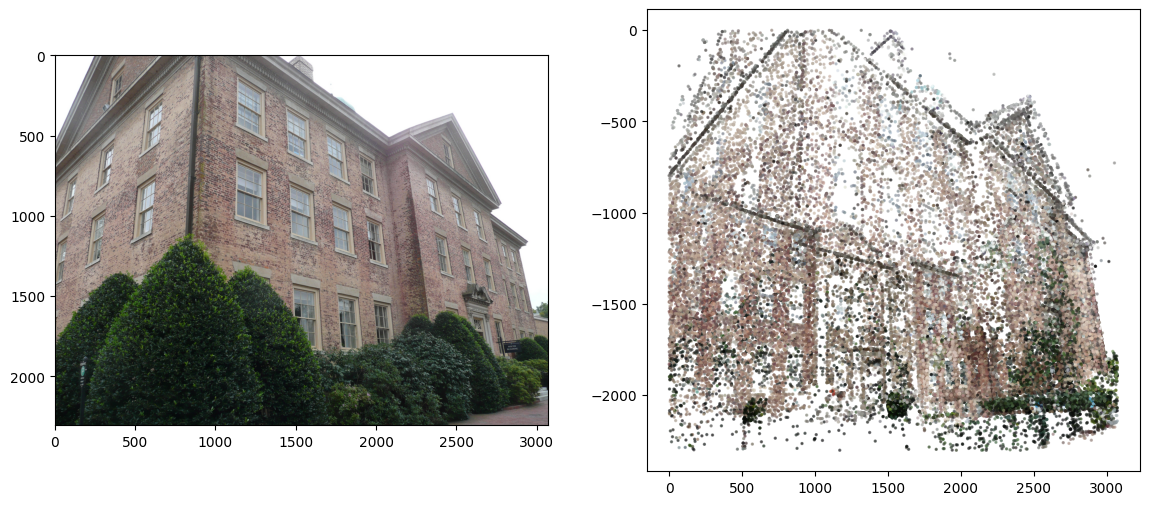

In [47]:
from src.geometry.point_transformation import projection_from_reconstruction, filter_view_points

img_id = 60
img = reconstruction.images[img_id]
img_name = img.name
img_points, colors = projection_from_reconstruction(reconstruction, img_id)
points, colors = filter_view_points(img_points, colors, width, height)
image = mpimg.imread(images_folder / f'{img_name}')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.scatter(points[:, 0], -points[:, 1], alpha=0.5, c=colors, s=2)

In [48]:
image.shape

(2304, 3072, 3)

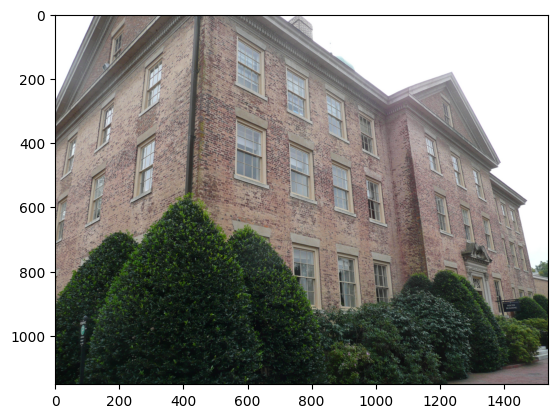

In [49]:
downscaled = downscale_local_mean(image, (2, 2, 1)).astype(np.uint8)
plt.imshow(downscaled)

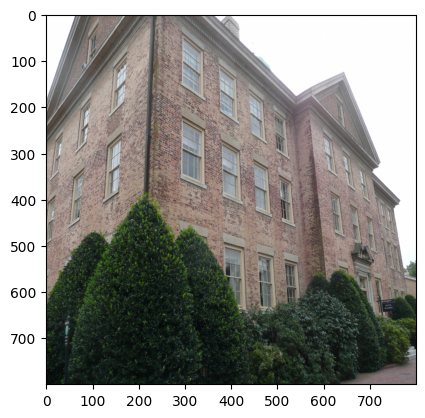

In [50]:
plt.imshow(resize(downscaled, (800, 800)))

### Full example

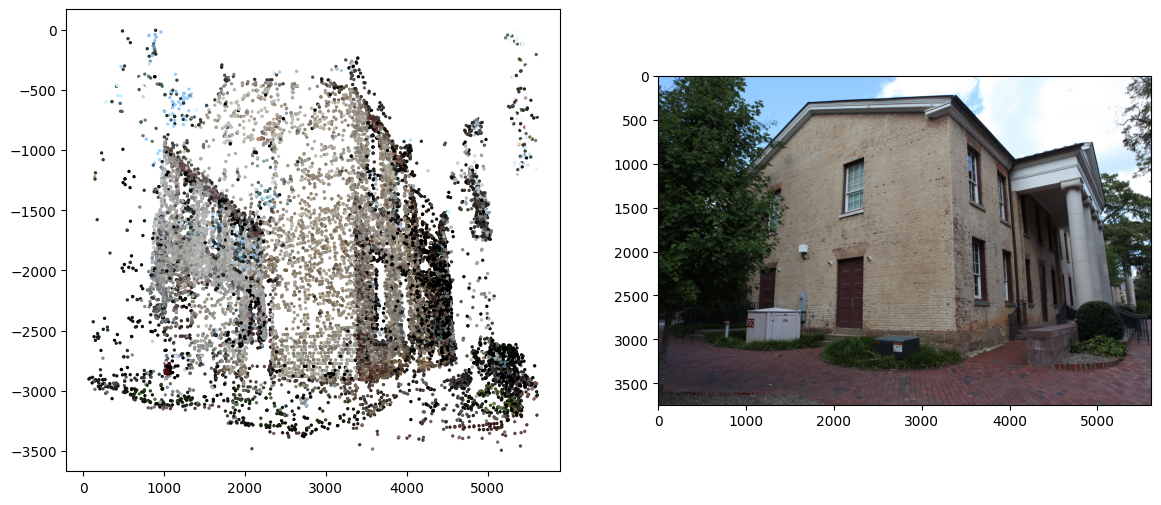

In [51]:
from src.geometry.point_transformation import *

scene_folder = Path('../data/gerrard-hall')
images_folder = scene_folder / 'images'
database_path = scene_folder / 'database.db'
output_path = scene_folder / 'undistorted_images'

reconstruction_2 = pycolmap.Reconstruction(output_path / 'sparse')

img_id = 10
img = reconstruction_2.images[img_id]
cam_id = 1

extrinsic_matrix = get_extrinsic_params(img.cam_from_world)
f, cx, cy = reconstruction_2.cameras[cam_id].params
width, height = reconstruction_2.cameras[cam_id].width, reconstruction_2.cameras[cam_id].height
znear, zfar = 1, 5
intrinsic_matrix = get_intrinsic_opengl_params(f, f, height, width, zfar=zfar, znear=znear)

colors = np.array([p.color for p in reconstruction_2.points3D.values()]) / 255.0
homogeneous_points = convert_to_homogenous(get_points_xyz(reconstruction_2))
camera_coordinates = homogeneous_points @ extrinsic_matrix.T
clip_coordinates = camera_coordinates @ intrinsic_matrix.T
point_ids = cull_coordinates_ids(clip_coordinates, camera_coordinates, zfar=zfar, znear=znear)

ndc_coordinates = to_ndc_coordinates(clip_coordinates[point_ids])
c = colors[point_ids]

screen_coordinates = to_screen_coordinates(ndc_coordinates, width, height, zfar, znear)
image = mpimg.imread(images_folder / f'{img.name}')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(screen_coordinates[:, 0], -screen_coordinates[:, 1], s=2, c=c)
plt.subplot(1, 2, 2)
plt.imshow(image)